## Facebook Network Analysis

In [130]:
# Import relevant library
import networkx as nx

#### E1

In [131]:
# Path to facebook data file
file_path = "facebook_combined-1.txt"

# Load facebook social network data from path
SN = nx.read_edgelist(file_path, data=('weight'))

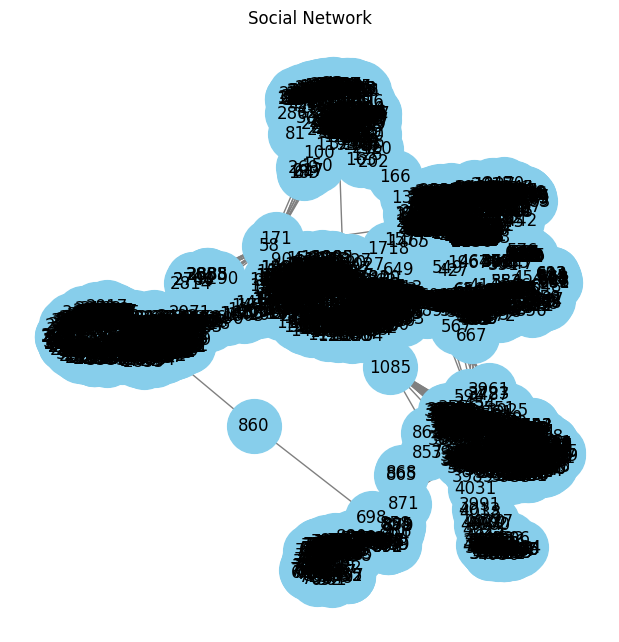

In [133]:
# Visualize the network
plt.figure(figsize=(6, 6))
pos = nx.spring_layout(SN, seed=42)
nx.draw(SN, pos, with_labels=True, node_color='skyblue', node_size=1500, edge_color='gray')
plt.title("Social Network")
plt.show()

In [135]:
# Basic Network Statistics
num_nodes = SN.number_of_nodes()
num_edges = SN.number_of_edges()
avg_degree = sum(dict(SN.degree()).values()) / num_nodes

print("Basic Network Statistics:") 
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Density: {nx.density(SN):.6f}")
print(f"Average degree: {avg_degree:.2f}")

Basic Network Statistics:
Number of nodes: 4039
Number of edges: 88234
Density: 0.010820
Average degree: 43.69


#### E2

In [136]:
# Degree Centrality
deg_centrality = nx.degree_centrality(SN)
sorted_deg_cent = sorted(deg_centrality.items(), key=lambda x: x[1], reverse=True)

# Closeness Centrality
closeness_centrality = nx.closeness_centrality(SN)
highest_closeness_nodes = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]


# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(SN)
highest_betweenness_nodes = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

# Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(SN)
highest_eigenvector_nodes = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

# PageRank
pagerank = nx.pagerank(SN)
highest_pagerank_nodes = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:5]


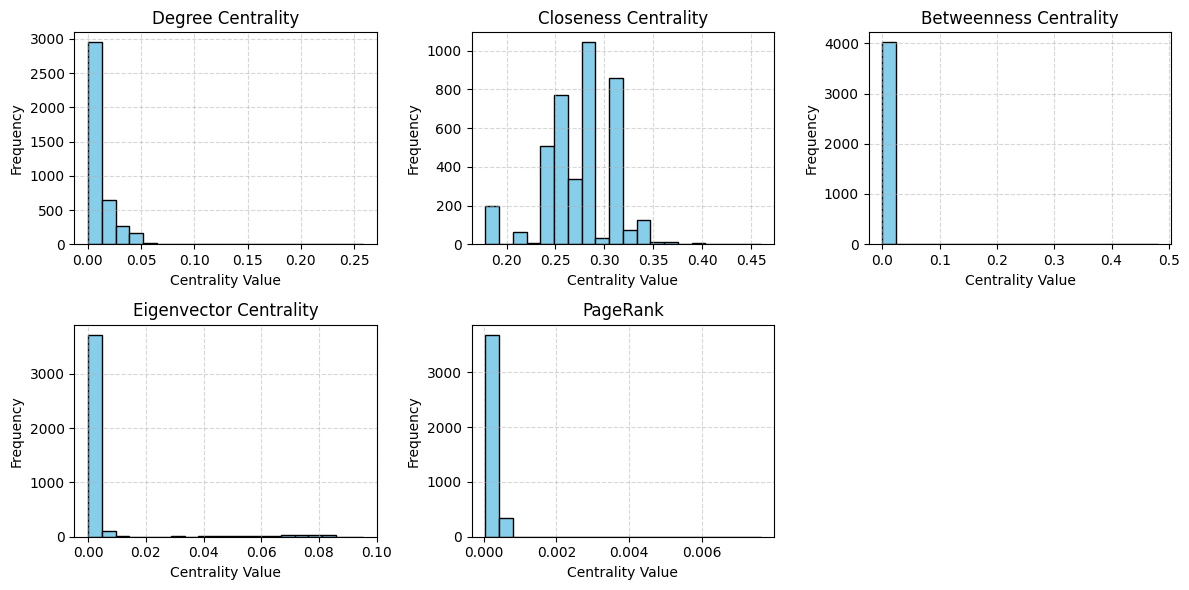

In [447]:
# Prepare centrality measures in a dictionary
centrality_measures = {
    "Degree Centrality": deg_centrality,
    "Closeness Centrality": closeness_centrality,
    "Betweenness Centrality": betweenness_centrality,
    "Eigenvector Centrality": eigenvector_centrality,
    "PageRank": pagerank
}

# Plot distributions
plt.figure(figsize=(12, 6))
for i, (name, values) in enumerate(centrality_measures.items(), 1):
    plt.subplot(2, 3, i)
    plt.hist(values.values(), bins=20, color='skyblue', edgecolor='black')
    plt.title(name)
    plt.xlabel("Centrality Value")
    plt.ylabel("Frequency")
    plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

#### E3

Community detection

In [455]:
# List community detection algorithm
algorithms = ["Louvain Modularity", "Label Propagation"]

# Dictionary to store communities detected by each algorithm
detected_comm = {}

# Apply each community detection algorithm and store the detected communities
for algorithm in algorithms:
    if algorithm == "Louvain Modularity":
        comm = nx.algorithms.community.greedy_modularity_communities(SN)
    elif algorithm == "Label Propagation":
        comm = nx.algorithms.community.label_propagation_communities(SN)
    detected_comm[algorithm] = communities # Convert to list of sets for consistency

# Store results in a DataFrame
results = []
for algorithm, communities in detected_communities.items():
    modularity = nx.algorithms.community.modularity(SN, communities)
    num_communities = len(communities)
    community_sizes = [len(c) for c in communities]
    average_community_size = sum(len(community) for community in communities) / num_communities
    edges_per_cluster = [SN.subgraph(c).number_of_edges() for c in communities]
    
    results.append({
        "Algorithm": algorithm,
        "Modularity": modularity,
        "Num_Communities": num_communities,
        "Nodes_per_Community": community_sizes,
        "Average_Community_Size" :average_community_size,
        "Edges_per_Cluster": edges_per_cluster
    })
# Assign results to dataframe
df_results = pd.DataFrame(results)
df_results

,Algorithm,Modularity,Num_Communities,Nodes_per_Community,Average_Community_Size,Edges_per_Cluster
0,Louvain Modularity,0.774529,16,"[1031, 739, 547, 542, 357, 220, 208, 206, 59, 49, 25, 22, 19, 6, 6, 3]",252.437500,"[26395, 12518, 5323, 13646, 2891, 5467, 15353, 1983, 201, 566, 260, 75, 136, 8, 14, 3]"
1,Label Propagation,0.736841,44,"[198, 36, 10, 8, 8, 34, 2, 215, 16, 3, 3, 1030, 6, 7, 3, 3, 753, 10, 2, 2, 469, 13, 9, 3, 49, 25, 2, 60, 547, 179, 10, 9, 8, 226, 19, 4, 3, 8, 6, 14, 12, 7, 6, 2]",91.795455,"[1980, 180, 39, 18, 19, 239, 1, 3199, 59, 2, 2, 27356, 12, 8, 2, 2, 30775, 31, 1, 1, 8277, 64, 13, 2, 396, 260, 1, 205, 5323, 1853, 40, 24, 19, 5600, 136, 6, 3, 27, 14, 47, 43, 20, 15, 1]"


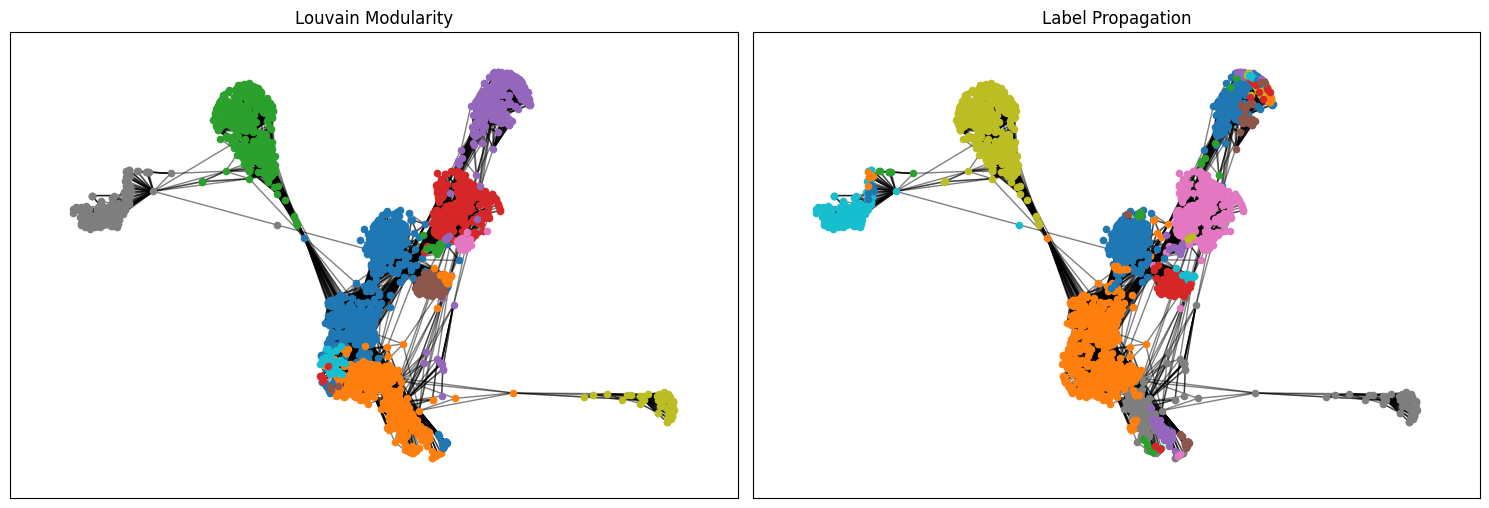

In [453]:
# Visualise community structures for
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(SN)

for i, (algorithm, communities) in enumerate(detected_comm.items()):
    plt.subplot(2, 2, i + 1)
    colors = [f'C{i}' for i in range(len(communities))]
    for j, community in enumerate(communities):
        nx.draw_networkx_nodes(SN, pos, nodelist=community,
                               node_color=colors[j], node_size=20)
    nx.draw_networkx_edges(SN, pos, alpha=0.5)
    plt.title(algorithm)

plt.tight_layout()
plt.show()